# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [3]:
#load the dataset
data=pd.read_csv("/content/drive/MyDrive/Titanic FIVE/titanic3.csv")

In [4]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


**Check Missing Value**

In [7]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

**Remove Missing Value**

In [8]:
data["age"] = data["age"].fillna(data.age.mean())
data["fare"] = data["fare"].fillna(data.fare.mean())
# mode = data["embarked"].mode()
data["embarked"]= data["embarked"].fillna("S")

In [9]:
data.embarked.value_counts()

embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [10]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
data.drop(["boat", "body", "home.dest", "cabin", "name"], axis = 1, inplace = True)

In [12]:
def object_to_numeric(data, columns):
  label_encoder = preprocessing.LabelEncoder()
  for col in columns:
    data[col]= label_encoder.fit_transform(data[col])
  return data


In [13]:
data = object_to_numeric(data, ["sex", "ticket", "embarked"])

In [14]:
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,0,29.00,0,0,187,211.3375,2
1,1,1,1,0.92,1,2,49,151.5500,2
2,1,0,0,2.00,1,2,49,151.5500,2
3,1,0,1,30.00,1,2,49,151.5500,2
4,1,0,0,25.00,1,2,49,151.5500,2


**Feature Engineering with Visualization**


In [15]:
survival_counts = data['survived'].value_counts().reset_index()
survival_counts.columns = ['survived', 'count']
survival_counts['survived'] = survival_counts['survived'].map({0: 'Not Survived', 1: 'Survived'})
fig = px.bar(survival_counts, x='survived', y='count',
             title='Survival Count',
             labels={'survived': 'Survival Status', 'count': 'Count'},
             color='survived',
             color_discrete_map={'Not Survived': 'red', 'Survived': 'green'})
fig.show()

<Axes: xlabel='sex', ylabel='count'>

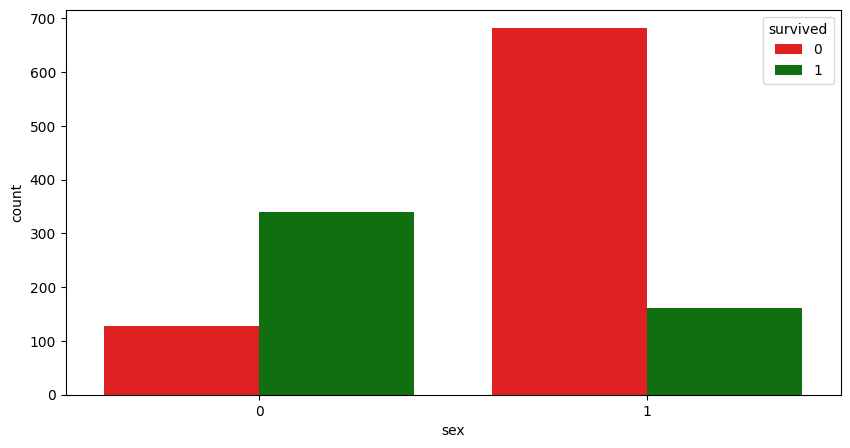

In [16]:
plt.figure(figsize=(10,5))
custom_palette = ["red", "green"]
sns.countplot(x="sex", data=data, palette=custom_palette, hue="survived")

<Axes: xlabel='pclass', ylabel='count'>

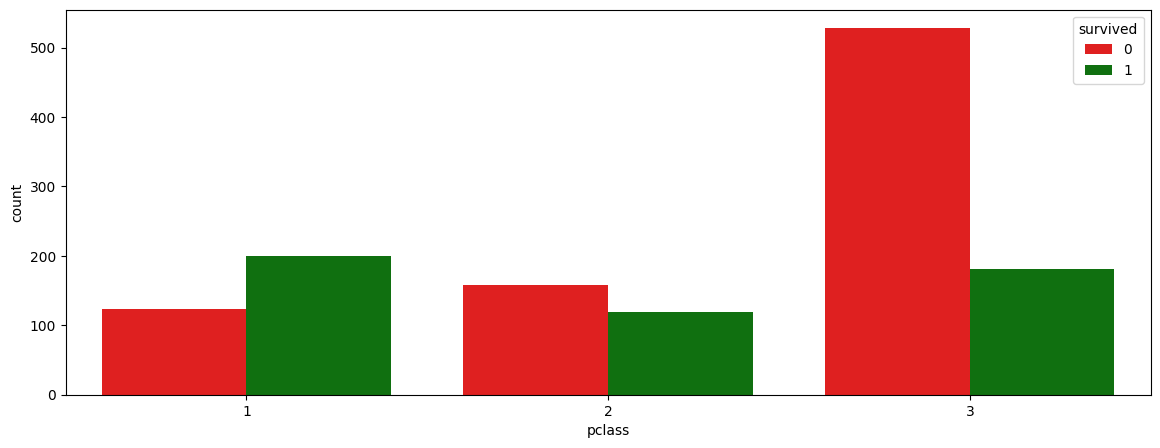

In [17]:
plt.figure(figsize=(14,5))
sns.countplot(x="pclass", data=data, palette=custom_palette, hue="survived")

In [18]:
data.embarked.value_counts()

embarked
2    916
0    270
1    123
Name: count, dtype: int64

In [19]:
survival_counts = data['embarked'].value_counts().reset_index()
survival_counts.columns = ['embarked', 'count']
survival_counts['embarked'] = survival_counts['embarked'].map({0: 'C', 1: 'Q', 2: 'S'})
fig = px.bar(survival_counts, x='embarked', y='count',
             title='Embarked Count',
             labels={'Embarked': 'Embarked Status', 'count': 'Count'},
             color='embarked',
             color_discrete_map={'S': 'red', 'C': 'green', 'Q': "orange"})
fig.show()

**Three Additional Features**

In [20]:
data["family_size"]=data["sibsp"] + data["parch"]+1

In [21]:
data.drop(["sibsp","parch"],axis=1, inplace = True)

In [22]:
data["mpc"] = data["age"] * data["pclass"]

In [23]:
data.age=pd.cut(data["age"],bins=[0,12,21,40,100],labels=["baby","child","teenager","adult"])

In [24]:
data = object_to_numeric(data, ["age"])

In [25]:
data.head()

,pclass,survived,sex,age,ticket,fare,embarked,family_size,mpc
0,1,1,0,3,187,211.3375,2,1,29.00
1,1,1,1,1,49,151.5500,2,4,0.92
2,1,0,0,1,49,151.5500,2,4,2.00
3,1,0,1,3,49,151.5500,2,4,30.00
4,1,0,0,3,49,151.5500,2,4,25.00


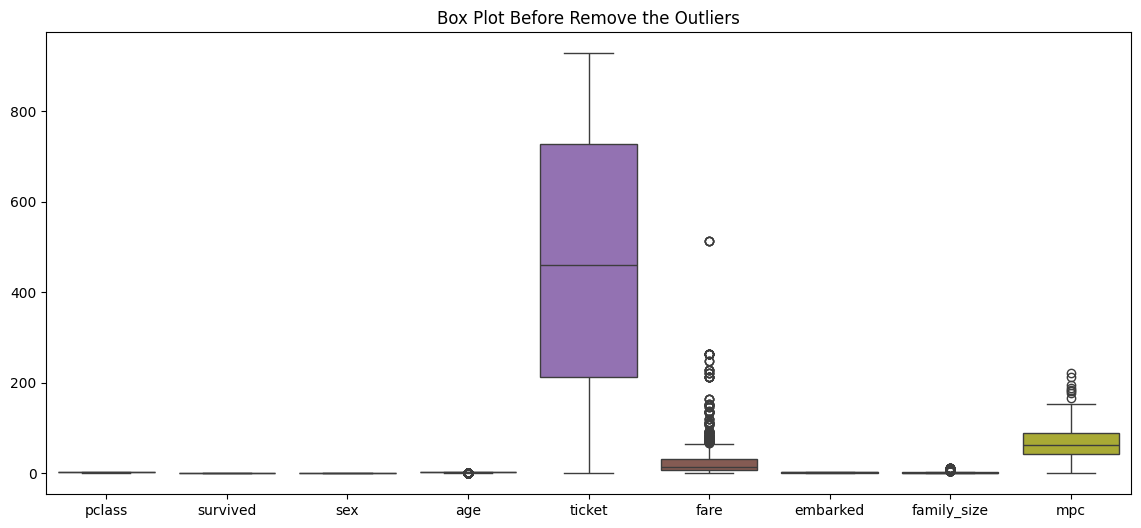

In [26]:
# Plot boxplots using seaborn
plt.figure(figsize=(14, 6))
sns.boxplot(data=data)
plt.title("Box Plot Before Remove the Outliers")
plt.show()


In [27]:
def remove_outlier(train_data, cols):
  for col in cols:
      q1 = train_data[col].quantile(0.25)
      q3 = train_data[col].quantile(0.75)
      iqr = (q3 - q1)
      upper_limit = q3 + 1.5 * iqr
      lower_limit = q1 - 1.5 * iqr
      train_data[col] = np.where(train_data[col] > upper_limit, upper_limit,
                                  np.where(train_data[col] < lower_limit, lower_limit,
                                          train_data[col]))
  return train_data

features = ["fare", "mpc"]
train_data = remove_outlier(data, features)

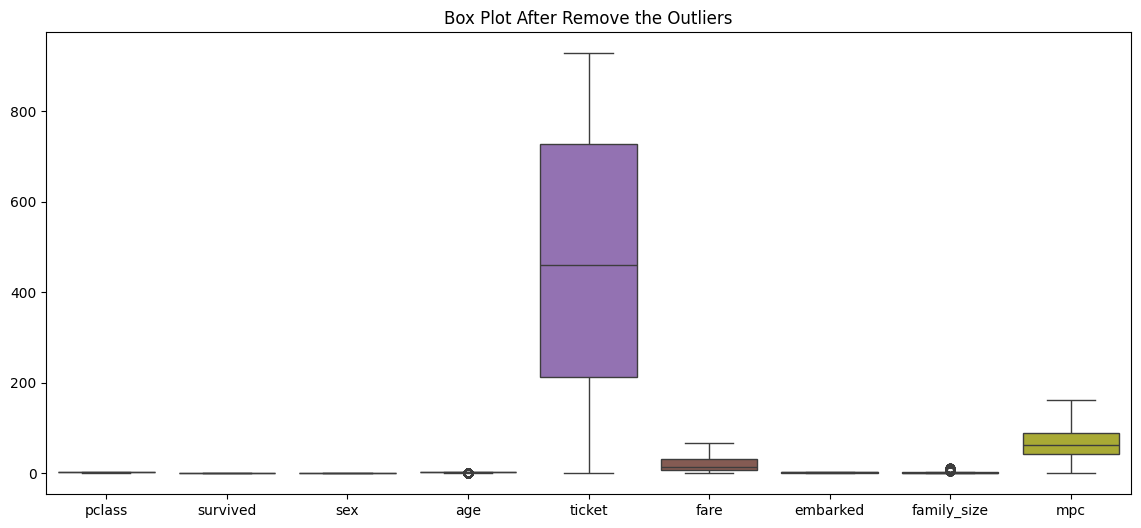

In [28]:
# Plot boxplots using seaborn
plt.figure(figsize=(14, 6))
sns.boxplot(data=data)
plt.title("Box Plot After Remove the Outliers")
plt.show()


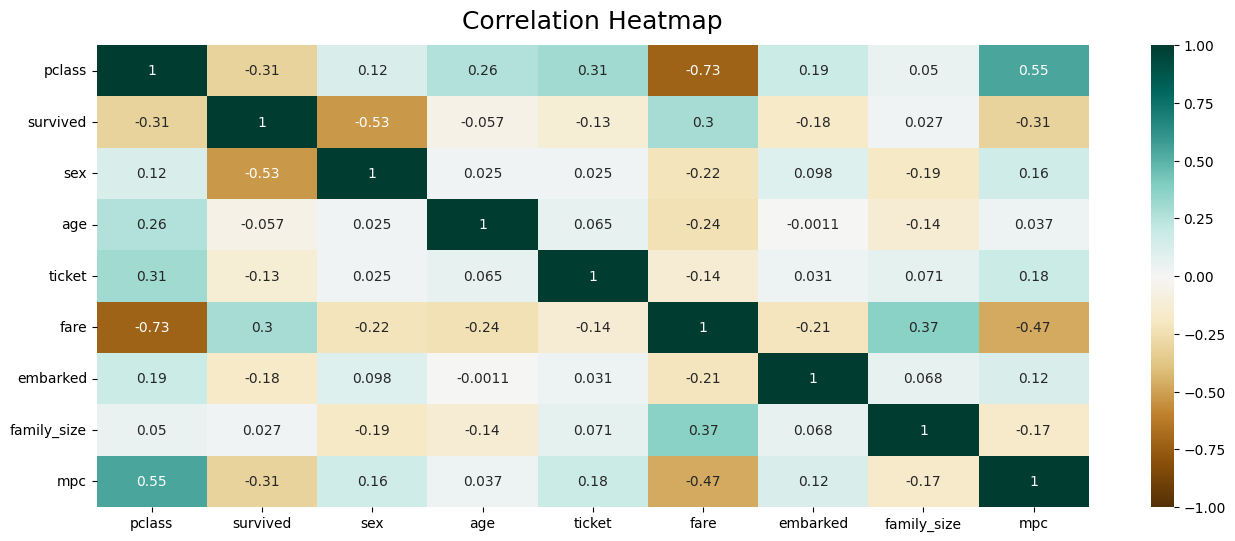

In [29]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [30]:
# get features and terget columns
Y=data.survived
X=data.drop(["survived"],axis=1)

# train test split

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 101)

In [32]:
xtrain.head()

,pclass,sex,age,ticket,fare,embarked,family_size,mpc
1218,3,1,3,710,8.0500,2,1,90.000000
1060,3,0,2,443,7.7750,2,1,54.000000
24,1,0,3,797,66.3438,2,1,29.000000
840,3,0,3,519,8.8500,2,1,72.000000
816,3,1,3,537,7.8958,0,1,89.643413


**Normalization of numerical data**

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
xtrain=pd.DataFrame(scaler.fit_transform(xtrain))
xtest=pd.DataFrame(scaler.transform(xtest))

# Building & Evaluate the Models

# Support Vector Machine

In [34]:
#support vector machine
svc=SVC(C=100, gamma=0.01, kernel = 'rbf')
svc.fit(xtrain, ytrain)
ypred_svc=svc.predict(xtest)
print("SVC accuracy score:", "{:.2f}".format(accuracy_score(ytest,ypred_svc)*100),"%")

SVC accuracy score: 80.92 %


In [35]:
print(classification_report(ytest,ypred_svc)) # for showing classification report

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       155
           1       0.77      0.76      0.76       107

    accuracy                           0.81       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



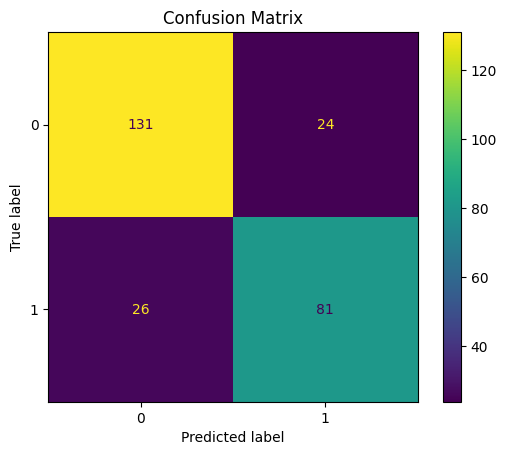

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ytest,ypred_svc))
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Random Forest


In [40]:
rf=RandomForestClassifier(n_estimators=150, max_depth=8,max_samples=0.75 )
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print("Randome forest accuracy score:", "{:.2f}".format(accuracy_score(ytest,ypred_rf)*100),"%")

Randome forest accuracy score: 82.44 %


In [41]:
print(classification_report(ytest,ypred_rf)) # for showing classification report

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       155
           1       0.84      0.71      0.77       107

    accuracy                           0.82       262
   macro avg       0.83      0.81      0.81       262
weighted avg       0.83      0.82      0.82       262



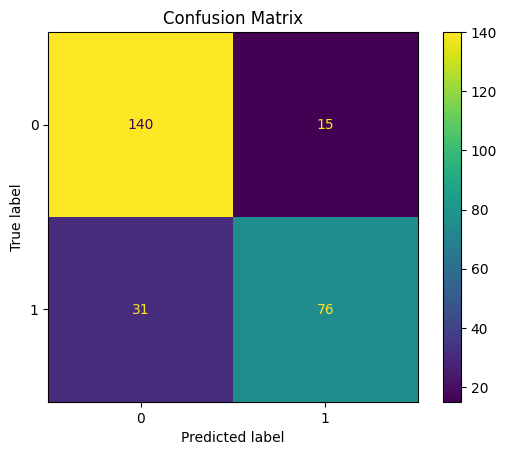

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ytest,ypred_rf))
disp.plot()
plt.title("Confusion Matrix")
plt.show()